Accuracy: 0.8272980501392758


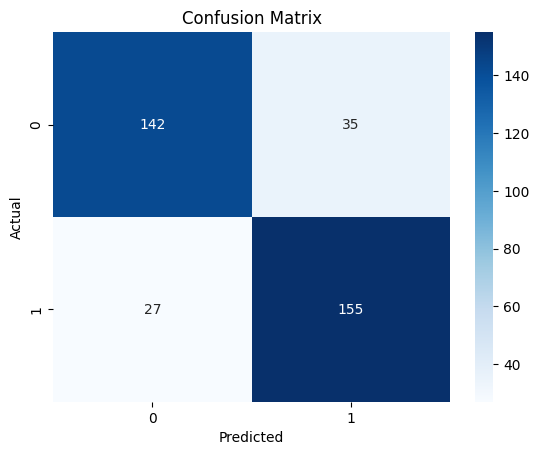

In [ ]:
# Sentiment Analysis on a sample dataset
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Loading the dataset (change the path of csv files according tou your path of storage)
train_path = r'dataset1\train_data.csv'
test_path = r'dataset1\test_data.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Text Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

train_data['clean_sentence'] = train_data['sentence'].apply(preprocess_text)
test_data['clean_sentence'] = test_data['sentence'].apply(preprocess_text)

# Vectorizing Text
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['clean_sentence'])
X_test = vectorizer.transform(test_data['clean_sentence'])

y_train = train_data['sentiment']
y_test = test_data['sentiment']

# Training Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.911


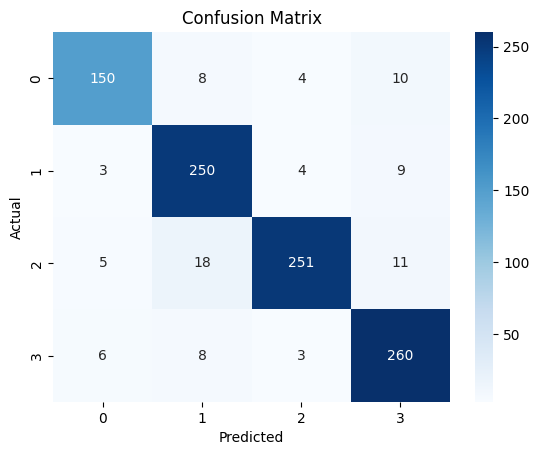

In [ ]:
# Sentiment Analysis on Twitter sentiment analysis dataset
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#  Loading the dataset (change the path of csv files according tou your path of storage)
twitter_training_path = r'dataset2\twitter_training.csv'
twitter_validation_path = r'\dataset2\twitter_validation.csv'

column_names = ['id', 'entity', 'sentiment', 'Text'] 

training_data = pd.read_csv(twitter_training_path, header=None, names=column_names)
validation_data = pd.read_csv(twitter_validation_path, header=None, names=column_names)

# Text Preprocessing
def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text


training_data['clean_text'] = training_data['Text'].apply(preprocess_text)
validation_data['clean_text'] = validation_data['Text'].apply(preprocess_text)

#  Vectorizing Text
vectorizer = TfidfVectorizer()
X_training = vectorizer.fit_transform(training_data['clean_text'])
X_validation = vectorizer.transform(validation_data['clean_text'])

y_training = training_data['sentiment']
y_validation = validation_data['sentiment']


# Training Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_training, y_training)

# Predict and Evaluate
y_pred = model.predict(X_validation)
print(f"Accuracy: {accuracy_score(y_validation, y_pred)}")

cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
